In [121]:
from sklearn.cluster import KMeans

In [122]:
from sklearn.decomposition import PCA

In [123]:
from sklearn.metrics import davies_bouldin_score

In [124]:
import pandas as pd


In [125]:
# Load data

In [126]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [127]:
# Prepare features

In [128]:
features = pd.get_dummies(customer_features[["Region", "total_spent", "avg_transaction", "favorite_category"]])

In [129]:
# Elbow Method to find optimal clusters

In [130]:
inertia = []

In [131]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    inertia.append(kmeans.inertia_)

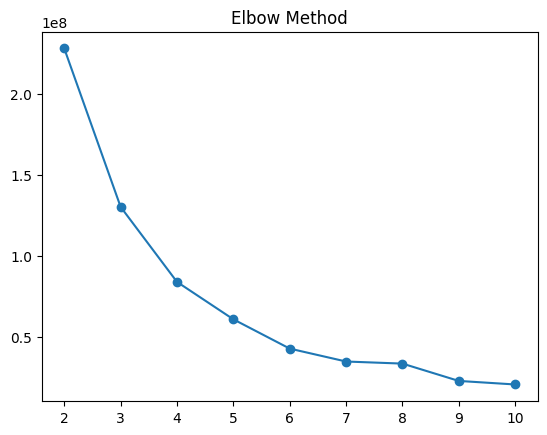

In [132]:
plt.plot(range(2,11), inertia, marker='o')
plt.title("Elbow Method")
plt.show()

In [133]:
# Clustering with K=4

In [134]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [135]:
clusters = kmeans.fit_predict(features)

In [136]:
# Evaluate

In [137]:
db_index = davies_bouldin_score(features, clusters)

In [138]:
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 0.60


In [139]:
# Visualize with PCA

In [140]:
pca = PCA(n_components=2)

In [141]:
reduced = pca.fit_transform(features)

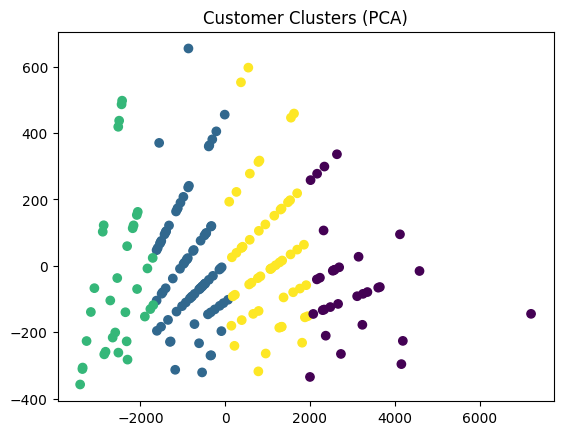

In [142]:
plt.scatter(reduced[:,0], reduced[:,1], c=clusters, cmap="viridis")
plt.title("Customer Clusters (PCA)")
plt.show()